In [54]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from sklearn import preprocessing
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
import pandas as pd
import numpy as np
import time

### get cifar dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

### mlp archi

In [39]:
def define_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [40]:
model = define_sequantial_model()

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
def training_sequantial_model(model, size):
    history = model.fit(x_train, y_train, epochs=50, batch_size=size, validation_data=(x_val, y_val))
    return history

In [37]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title(f'{title} - loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(f'{title} - accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

### train and validation set (20%)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [31]:
x_train.shape

(40000, 32, 32, 3)

In [32]:
y_train.shape

(40000, 10)

In [8]:
x_val.shape

(10000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

### mini-batch SGD (batch_size = 128, learning_rate = 0.01, epochs = 50)

In [42]:
mini_sgd_model = define_sequantial_model()

mini_sgd_time_start = time.time()
mini_sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_history = training_sequantial_model(mini_sgd_model, 128)
mini_sgd_time_end = time.time()

mini_sgd_time = mini_sgd_time_end - mini_sgd_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2160 - loss: 2.1661 - val_accuracy: 0.2984 - val_loss: 1.9498
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3252 - loss: 1.9047 - val_accuracy: 0.3367 - val_loss: 1.8620
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3549 - loss: 1.8169 - val_accuracy: 0.3382 - val_loss: 1.8439
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3736 - loss: 1.7680 - val_accuracy: 0.3630 - val_loss: 1.7799
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3885 - loss: 1.7357 - val_accuracy: 0.3643 - val_loss: 1.7674
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3998 - loss: 1.7106 - val_accuracy: 0.3815 - val_loss: 1.7240
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4026 - loss: 1.6901 - val_accuracy: 0.3897 - val_loss: 1.7299
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4125 - loss: 1.6695 - val_accuracy

### learning curves on train/validation set

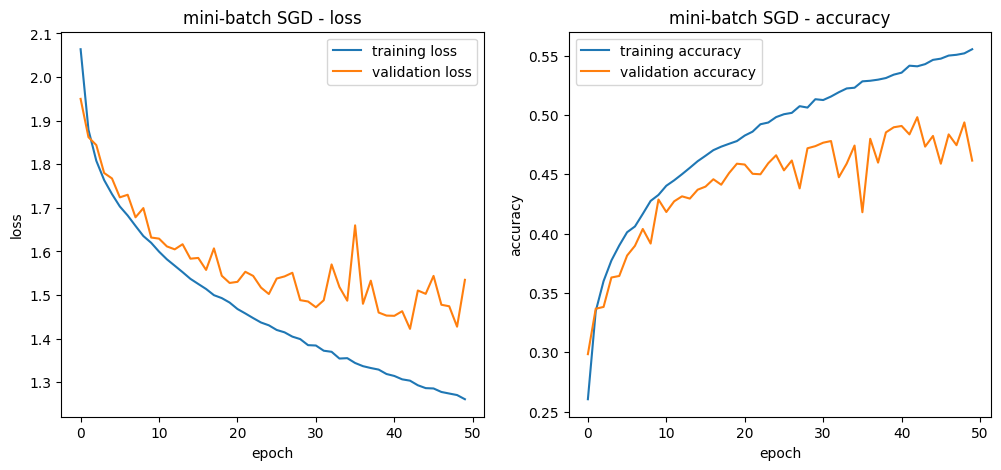

In [43]:
plot_learning_curves(mini_sgd_history, 'mini-batch SGD')

In [ ]:
print('mini-batch sgd execution time:', mini_sgd_time)

mini-batch sgd execution time: 176.36698484420776


### L2 norm regularization

In [50]:
def define_l2_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(10, activation='softmax'))
    return model

In [51]:
mini_sgd_l2_model = define_l2_sequantial_model()

mini_sgd_l2_time_start = time.time()
mini_sgd_l2_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_l2_history = training_sequantial_model(mini_sgd_l2_model, 128)
mini_sgd_l2_time_end = time.time()

mini_sgd_l2_time = mini_sgd_l2_time_end - mini_sgd_l2_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2168 - loss: 2.9834 - val_accuracy: 0.2896 - val_loss: 2.7430
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3233 - loss: 2.6505 - val_accuracy: 0.3254 - val_loss: 2.5634
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3547 - loss: 2.4914 - val_accuracy: 0.3580 - val_loss: 2.4191
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3727 - loss: 2.3728 - val_accuracy: 0.3676 - val_loss: 2.3167
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3827 - loss: 2.2791 - val_accuracy: 0.3811 - val_loss: 2.2193
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3957 - loss: 2.1861 - val_accuracy: 0.3946 - val_loss: 2.1503
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4042 - loss: 2.1192 - val_accuracy: 0.4025 - val_loss: 2.0795
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4111 - loss: 2.0540 - val_accura

### learning curves on train/validation set

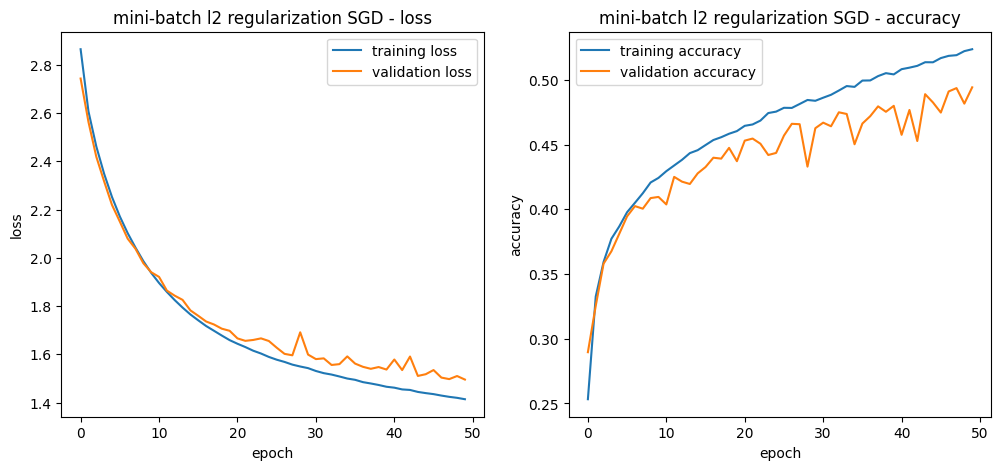

In [52]:
plot_learning_curves(mini_sgd_l2_history, 'mini-batch l2 regularization SGD')

In [53]:
print('mini-batch sgd regularization execution time:', mini_sgd_l2_time)

mini-batch sgd regularization execution time: 175.91883039474487


### comparaison

### dropout layer (rates 0.2, 0.3, 0.5)

In [55]:
def define_dropout_sequantial_model(dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) 
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax')) 
    return model

rate = 0.2

In [57]:
first_dropout_model = define_dropout_sequantial_model(dropout_rate=0.2)

first_dropout_time_start = time.time()
first_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
first_dropout_history = training_sequantial_model(first_dropout_model, 128)
first_dropout_time_end = time.time()

first_dropout_time = first_dropout_time_end - first_dropout_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1824 - loss: 3.0371 - val_accuracy: 0.2913 - val_loss: 2.7448
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2843 - loss: 2.7222 - val_accuracy: 0.3345 - val_loss: 2.5541
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3196 - loss: 2.5553 - val_accuracy: 0.3443 - val_loss: 2.4324
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3356 - loss: 2.4380 - val_accuracy: 0.3438 - val_loss: 2.3675
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3527 - loss: 2.3365 - val_accuracy: 0.3734 - val_loss: 2.2427
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3596 - loss: 2.2615 - val_accuracy: 0.3815 - val_loss: 2.1692
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3736 - loss: 2.1842 - val_accuracy: 0.3859 - val_loss: 2.1056
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3685 - loss: 2.1366 - val_accu

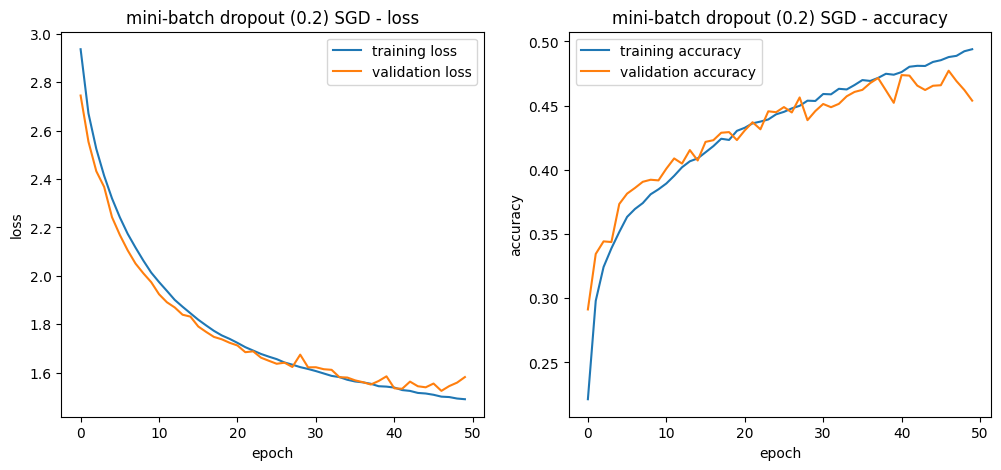

In [60]:
plot_learning_curves(first_dropout_history, 'mini-batch dropout (0.2) SGD')

In [61]:
print('mini-batch dropout (0.2) execution time:', first_dropout_time)

mini-batch dropout (0.2) execution time: 208.62914848327637


rate = 0.3

In [62]:
second_dropout_model = define_dropout_sequantial_model(dropout_rate=0.3)

second_dropout_time_start = time.time()
second_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
second_dropout_history = training_sequantial_model(second_dropout_model, 128)
second_dropout_time_end = time.time()

second_dropout_time = second_dropout_time_end - second_dropout_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1711 - loss: 3.0569 - val_accuracy: 0.3070 - val_loss: 2.7555
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2780 - loss: 2.7435 - val_accuracy: 0.3401 - val_loss: 2.5763
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3078 - loss: 2.5854 - val_accuracy: 0.3567 - val_loss: 2.4465
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3279 - loss: 2.4720 - val_accuracy: 0.3648 - val_loss: 2.3368
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3401 - loss: 2.3659 - val_accuracy: 0.3741 - val_loss: 2.2534
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3536 - loss: 2.2902 - val_accuracy: 0.3820 - val_loss: 2.1897
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3572 - loss: 2.2237 - val_accuracy: 0.3876 - val_loss: 2.1298
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3659 - loss: 2.1599 - val_accu

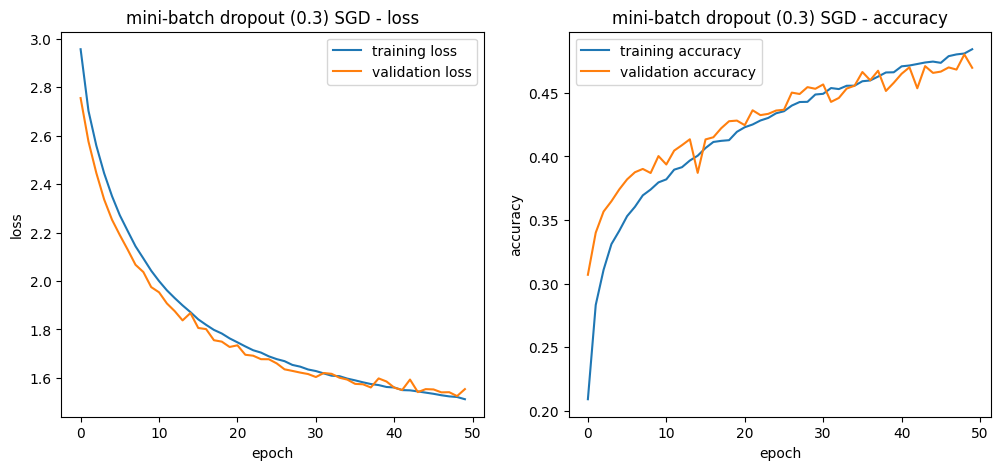

In [63]:
plot_learning_curves(second_dropout_history, 'mini-batch dropout (0.3) SGD')

In [64]:
print('mini-batch dropout (0.3) execution time:', second_dropout_time)

mini-batch dropout (0.3) execution time: 256.331027507782


rate = 0.5

In [65]:
third_dropout_model = define_dropout_sequantial_model(dropout_rate=0.5)

third_dropout_time_start = time.time()
third_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
third_dropout_history = training_sequantial_model(third_dropout_model, 128)
third_dropout_time_end = time.time()

third_dropout_time = third_dropout_time_end - third_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1732 - loss: 3.0458 - val_accuracy: 0.2833 - val_loss: 2.7680
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2509 - loss: 2.7758 - val_accuracy: 0.3223 - val_loss: 2.5826
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2850 - loss: 2.6247 - val_accuracy: 0.3444 - val_loss: 2.4616
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3073 - loss: 2.5117 - val_accuracy: 0.3507 - val_loss: 2.3651
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3181 - loss: 2.4156 - val_accuracy: 0.3573 - val_loss: 2.2800
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3258 - loss: 2.3367 - val_accuracy: 0.3566 - val_loss: 2.2212
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3298 - loss: 2.2803 - val_accuracy: 0.3743 - val_loss: 2.1474
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3377 - loss: 2.2032 - val_accu

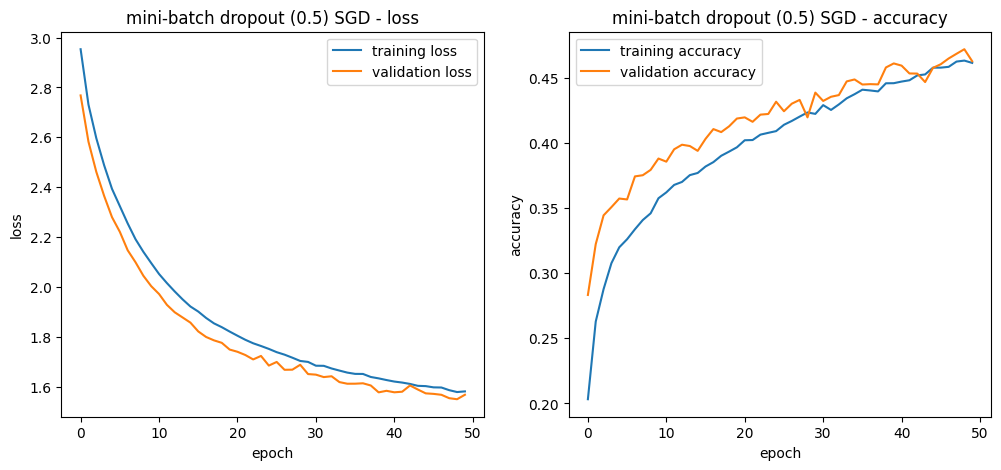

In [66]:
plot_learning_curves(third_dropout_history, 'mini-batch dropout (0.5) SGD')

In [67]:
print('mini-batch dropout (0.5) execution time:', third_dropout_time)

mini-batch dropout (0.5) execution time: 242.02780628204346


### comparaison

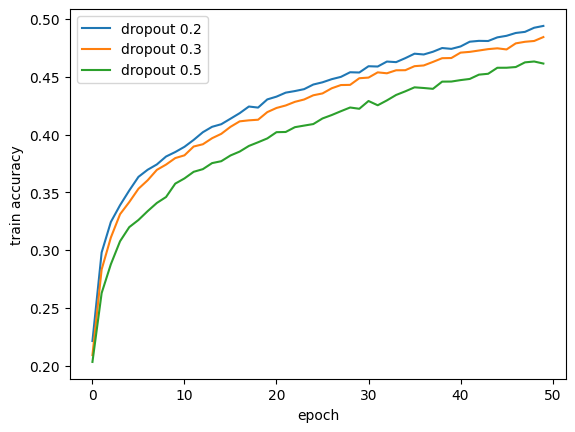

In [70]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

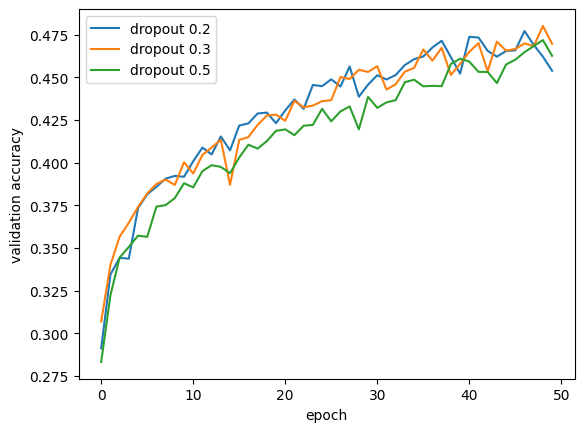

In [71]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['val_accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['val_accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['val_accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

### early stopping technique

### batch normalization layer

### random search to find best hyperparameter